# pypsbuilder workshop

## exploring the pseudosection

The pypsbuilder provides the classes to post-process constructed pseudosection. At first, we need to import appropriate class e.g. `PTPS`

In [1]:
from pypsbuilder import PTPS

and than we can read out pseudosection.

Note that on Windows there are a various ways how to provide literals corresponding to file path. You can use always:
```
'C:/mydir/mydir/file.ptb'
```
Another possibility is:
```
'C:\\mydir\\mydir\\file.ptb'
```
If you have problems with some names you can also try raw string literals:
```
r'C:\mydir\mydir\file.ptb'
```

In [2]:
pt = PTPS('/home/ondro/Vyuka/AdMetPet/pyps_training/avgpelite/avgpelite.ptb')

Now the `pt` is a reference to your pseudosection and is used to access all post-processing methods using dot notation, e.g. to show the pseudosection just type:

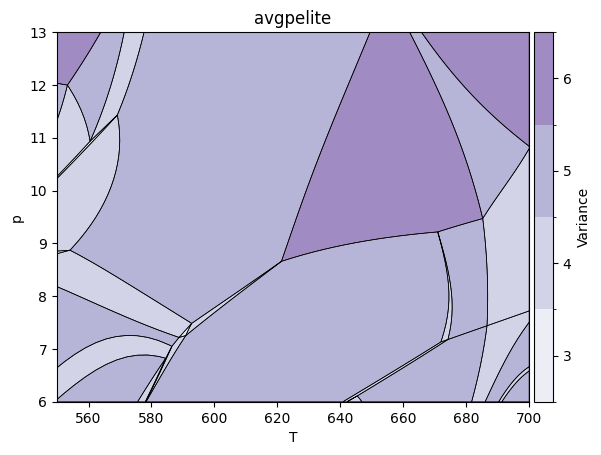

In [3]:
pt.show()

To produce more fancy figure, you can use various keyword arguments to modify behavior. For all arguments, check [documentation](https://pypsbuilder.readthedocs.io/en/master/api.html#pypsbuilder.psexplorer.PTPS.show)

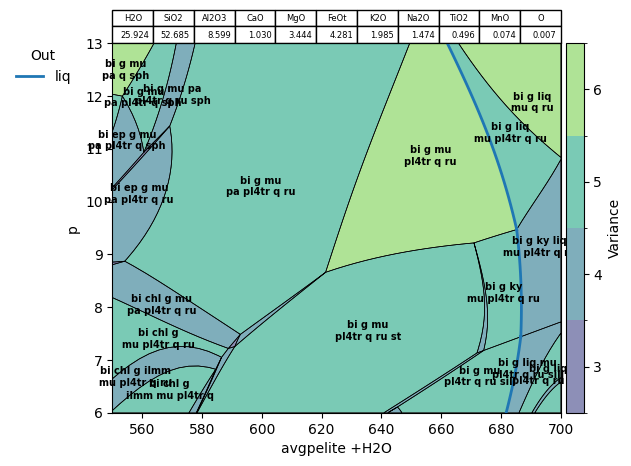

In [4]:
pt.show(bulk=True, cmap='viridis', label=True, labelfs=7, skiplabels=0.5, out=['liq'])

The main advantage of post-processing is to use THERMOCALC to calculate additional information within defined stable assemblage fields. The calculated values are stored in the project, so unless you edit your pseudosection in builder, the data are persistent. The if condition skip calculation, if already exists.

All calculations are done on regular grid using `calculate_composition` method.

In [5]:
if not pt.gridded:
    pt.calculate_composition(nx=100, ny=80)

You can also check status of calculation. It could give you some hints to possible mistakes, like metastable assemblage etc. Few missing dots along univariant lines are OK.

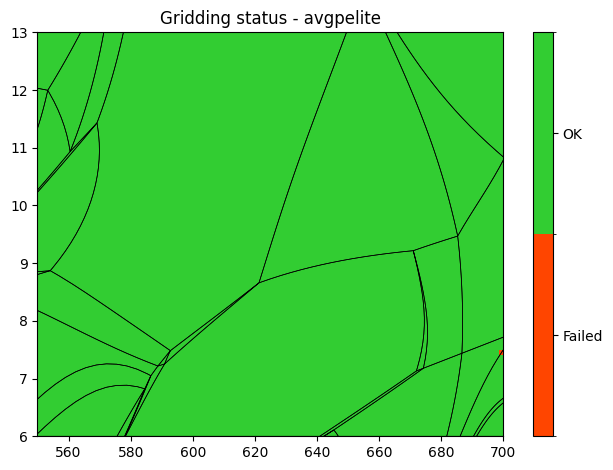

In [6]:
pt.show_status()

## Compositional isopleths

The isopleths are constructed by providing the `phase` and `expression` for `isopleths` method. The `phase` could also specify existing end-members. The isopleths are calculated for each field separately, based on values obtained by evaluation of the `expression`, which could use any calculated variables by THERMOCALC or any mathematical expression using those variables.

If you omit `expression`, available variables are shown.

In [7]:
pt.isopleths('g')

Missing expression argument. Available variables for phase g are:
x z m f xMgX xFeX xMnX xCaX xAlY xFe3Y H2O SiO2 Al2O3 CaO MgO FeO K2O Na2O TiO2 MnO O mode factor G H S V rho
Available end-members for g: spss kho gr alm py


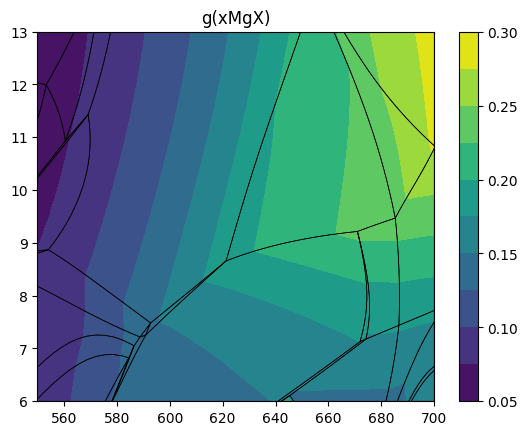

In [8]:
pt.isopleths('g', 'xMgX')

A similar diagram could be obtained using THERMOCALC end-member mode. Note parenthesis after phase name.

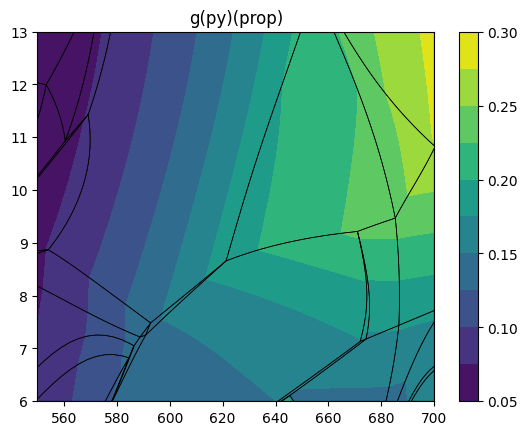

In [9]:
pt.isopleths('g(py)', 'prop')

There are several keyword arguments to modify the diagram. For all arguments, check [documentation](https://pypsbuilder.readthedocs.io/en/master/api.html#pypsbuilder.psexplorer.PTPS.isopleths)

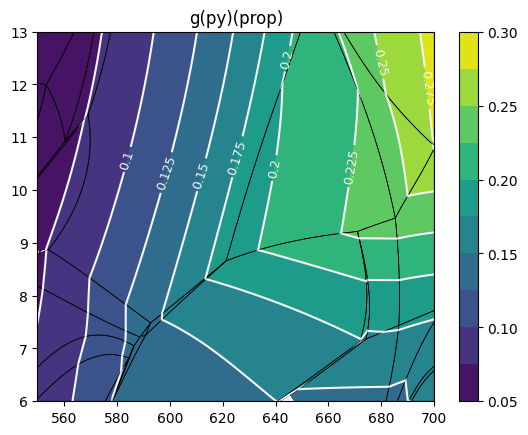

In [10]:
lbls = [pt.identify(600, 11), pt.identify(660, 11), pt.identify(690, 12.5)]
pt.isopleths('g(py)', 'prop', filled_over=True, labelkeys=lbls)

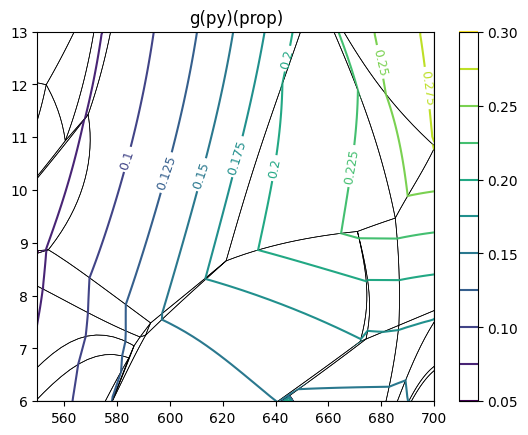

In [11]:
pt.isopleths('g(py)', 'prop', labelkeys=lbls, filled=False)

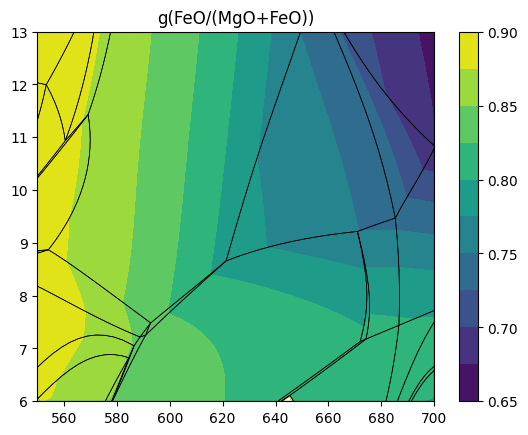

In [12]:
pt.isopleths('g', 'FeO/(MgO+FeO)')

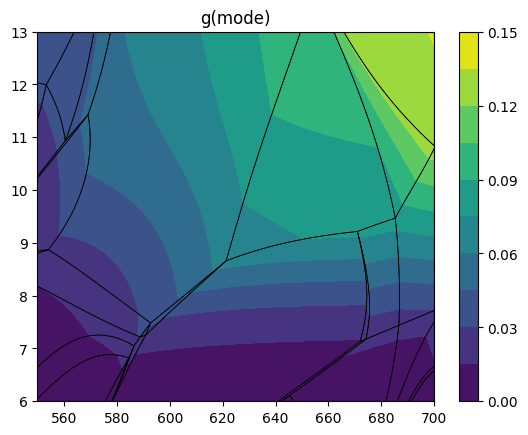

In [13]:
pt.isopleths('g', 'mode')

Using `matplotlib` you can create figures with multiple subplots

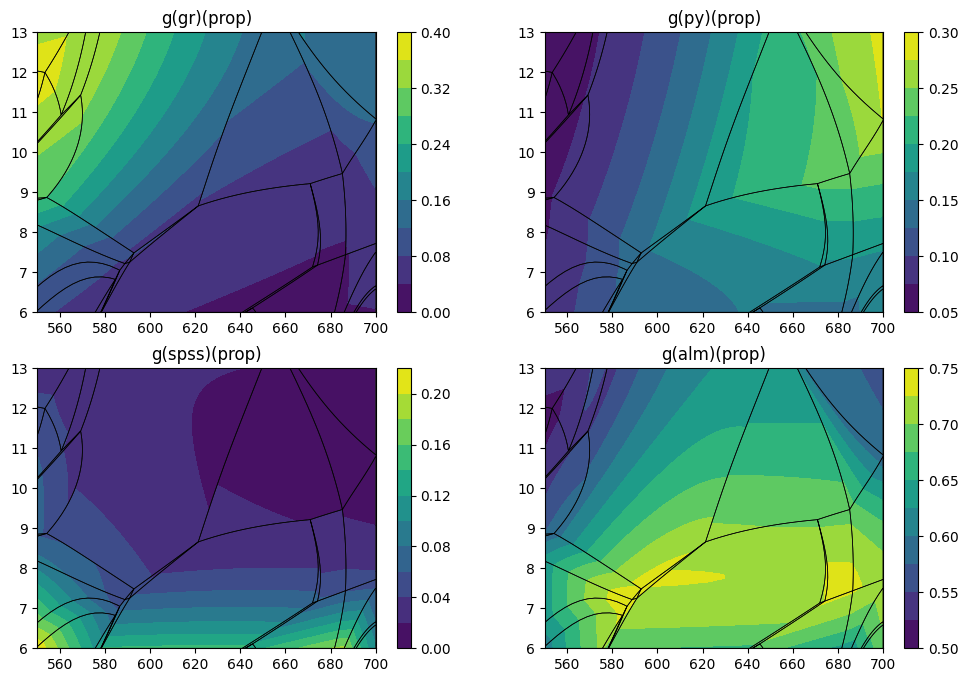

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for ax, em in zip(axs.flatten(), ['gr', 'py', 'spss', 'alm']):
    pt.isopleths(f'g({em})', 'prop', method='quadratic', ax=ax)

## Calculations along p-T paths

The explorer allows to make calculations along any p-T paths and visualize the results. p-T paths is created by interpoaltion of provided pairs of pressure-temperature. The kind of interpolation must be one of T `linear`, `slinear`, `quadratic`(default) or `cubic`.

In [15]:
t = [560, 620, 680, 660]
p = [6.6, 8, 9, 6.5]
pa = pt.collect_ptpath(t, p)

Calculating: 100%|████████████████████████████| 100/100 [00:03<00:00, 32.74it/s]


With result you can plot `expresion` on p-T paths

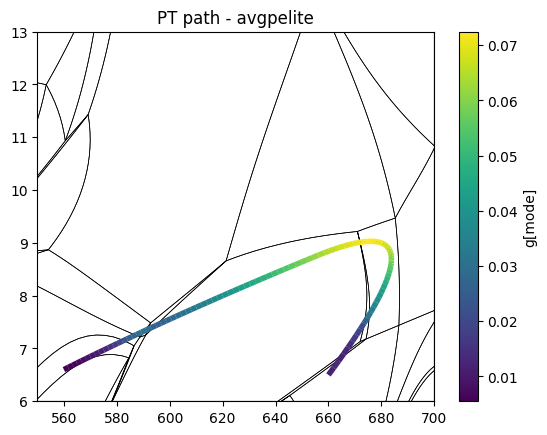

In [16]:
pt.show_path_data(pa, 'g', 'mode')

or you can create mode diagram

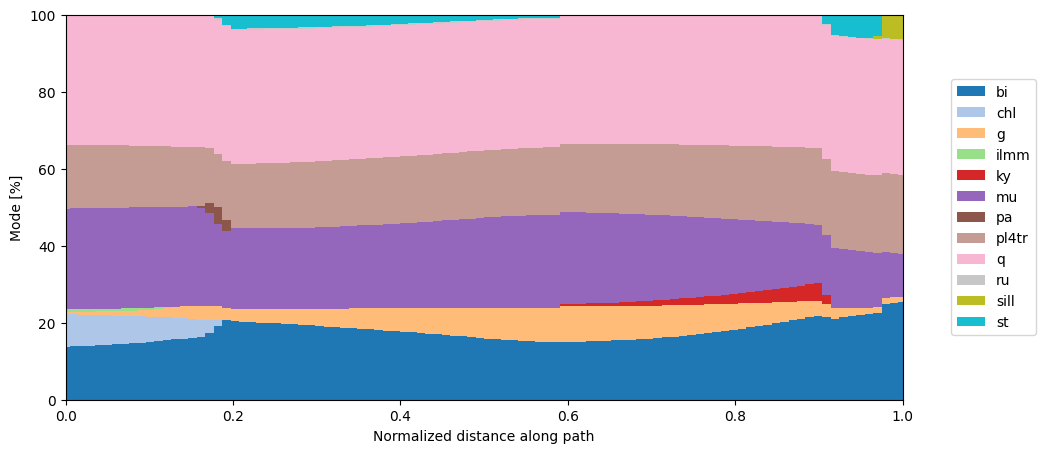

In [17]:
pt.show_path_modes(pa, exclude=['H2O'])

## Isopleths intersections and valid regions

Let's imagine that you want to locate p, T conditions to fit best to your measured garnet composition.

The composition of the core

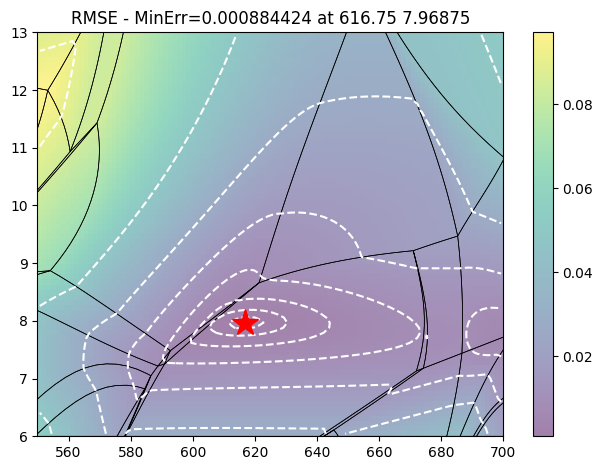

In [18]:
pt.search_composition(
    'g', 'xMgX', 0.17,
    'g', 'xFeX', 0.725,
    'g', 'xCaX', 0.07,
    'g', 'xMnX', 0.04
)

The composition of the rim. *Note, that we ignoring the fractionation of the garnmet from bul rock composition.*

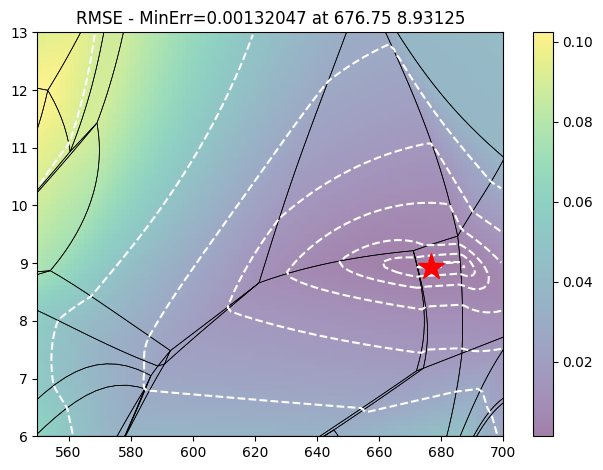

In [19]:
pt.search_composition(
    'g', 'xMgX', 0.22,
    'g', 'xFeX', 0.7,
    'g', 'xCaX', 0.05,
    'g', 'xMnX', 0.02
)

You can also visualze ranges of compositions

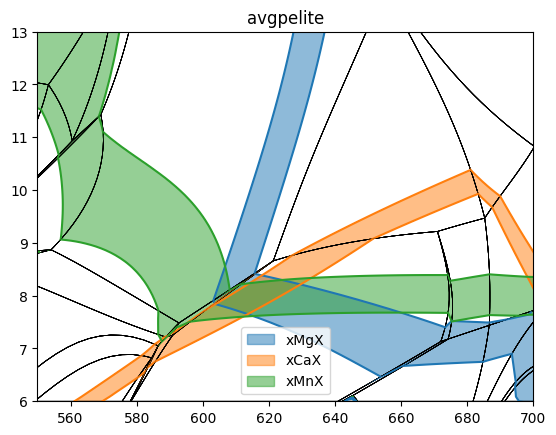

In [20]:
pt.overlap_isopleths(
    'g', 'xMgX', [0.16, 0.18],
    'g', 'xCaX', [0.065, 0.075],
    'g', 'xMnX', [0.03, 0.05]
)